# notebook to visualize fig 1a

In [1]:
!pip install psycopg2

  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.11-cp310-cp310-macosx_11_0_arm64.whl size=132227 sha256=a3a193795e547f5859e2a049d5a73475bba9c65201f7cb6947718f90b84d589e
  Stored in directory: /Users/varunpabreja/Library/Caches/pip/wheels/ef/c7/1c/9c6a8c0c80fc6713248040b66f381cbd07b64ef067ceba5da2
Successfully built psycopg2

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import psycopg2
import sqlalchemy

from sqlalchemy import create_engine
from sqlalchemy import text

import warnings
warnings.filterwarnings('ignore')

In [28]:
user = 'postgres'
password = 'postgres'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [29]:
con = psycopg2.connect(user=user, password=password, host=host, dbname=dbname)
cur = con.cursor()
cur.execute(f'SET search_path to {schema}')

In [31]:
#querying the materialized view

query = "SELECT * from varun_multimorbidity_by_age_bracket_1a"

df = pd.read_sql_query(query, con)
df

,age_bracket,n_in_bracket,n_multimorbid,pct_multimorbid,se_pct,sd_pct,sort_key
0,16-24,1168,380,32.534247,1.370852,46.850266,1
1,25-44,4507,2519,55.890836,0.739590,49.651768,2
2,45-64,12769,9495,74.359778,0.386413,43.664645,3
3,65-84,15747,13544,86.010034,0.276429,34.688290,4
4,≥85,2415,2182,90.351967,0.600800,29.524884,5


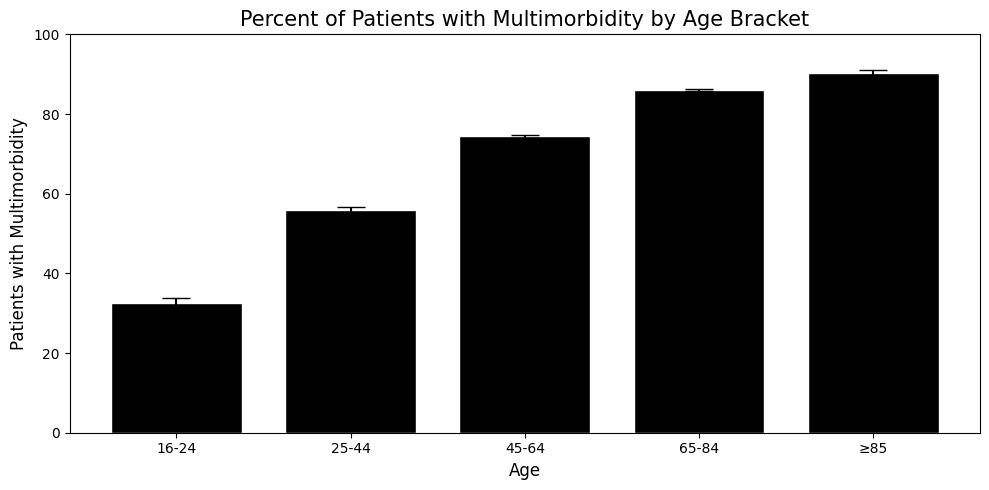

In [53]:
plt.figure(figsize=(10,5))

plt.bar(df['age_bracket'], df['pct_multimorbid'], yerr=df['se_pct'],
        capsize=10,
        width=0.75,
        color='black',
        edgecolor='white')

plt.ylim(0, 100)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Patients with Multimorbidity', fontsize=12)
plt.title('Percent of Patients with Multimorbidity by Age Bracket', fontsize=15)

plt.tight_layout()
plt.show();